## Melbourne crime index

In notebook 3, we have calculated the number of criminal incidents in diffrent postcodes along with its shapefiles. However, to calculate a crime index, we need to compare it with their relative population.

This notebook will calculate the number of criminal incidents per 1000 households and per 1000 people.


In [19]:
import pandas as pd
import geopandas as gpd

In [8]:
### Read crime data
crime_gdf = gpd.read_file("../data/processed/poa_crime_gdf.geojson")
crime_gdf.shape

(9001, 8)

In [9]:
crime_gdf.head()

,Year,Local Government Area,Postcode,Total Incidents,POA_CODE16,POA_NAME16,AREASQKM16,geometry
0,2011,Alpine,3691,5,3691,3691,1837.4123,"MULTIPOLYGON (((146.90262 -36.10540, 146.90189..."
1,2011,Alpine,3697,4,3697,3697,140.6154,"POLYGON ((147.13594 -36.69941, 147.13629 -36.6..."
2,2011,Alpine,3698,3,3698,3698,48.8349,"POLYGON ((147.13954 -36.72241, 147.14057 -36.7..."
3,2011,Alpine,3699,13,3699,3699,502.9748,"POLYGON ((147.16186 -36.73468, 147.16187 -36.7..."
4,2011,Alpine,3737,153,3737,3737,1737.5617,"POLYGON ((146.65912 -36.54841, 146.65910 -36.5..."


In [20]:
crime_gdf.dtypes

Year                        int64
Local Government Area      object
Postcode                   object
Total Incidents             int64
POA_CODE16                 object
POA_NAME16                 object
AREASQKM16                float64
geometry                 geometry
dtype: object

In [21]:
crime_gdf.POA_CODE16.nunique()

697

In [22]:
### Read postcode households
poa_hh = pd.read_csv("../data/processed/poa_households.csv")
poa_hh.shape

(698, 3)

In [23]:
poa_hh.head()

,POA_CODE16,Total Households,Population
0,3000,5804,49192
1,3002,1107,6196
2,3003,1087,5588
3,3004,2223,10861
4,3005,99,879


In [24]:
poa_hh.dtypes

POA_CODE16          int64
Total Households    int64
Population          int64
dtype: object

In [25]:
poa_hh.POA_CODE16 = poa_hh.POA_CODE16.astype(str)

In [27]:
poa_hh.POA_CODE16.nunique()

698

In [29]:
### Join data
crime_gdf = crime_gdf.merge(poa_hh, how="left", left_on="POA_CODE16", right_on="POA_CODE16")

In [69]:
crime_gdf.head()

,Year,Local Government Area,Postcode,Total Incidents,POA_CODE16,POA_NAME16,AREASQKM16,geometry,Total Households,Population,"Incidents by 10,000 households","Incidents by 10,000 population",Incidents by 1000 households,Incidents by 1000 population
0,2011,Alpine,3691,5,3691,3691,1837.4123,"MULTIPOLYGON (((146.90262 -36.10540, 146.90189...",2550,9600,1.960016,0.520779,1.960016,0.520779
1,2011,Alpine,3697,4,3697,3697,140.6154,"POLYGON ((147.13594 -36.69941, 147.13629 -36.6...",158,541,25.157233,7.380074,25.157233,7.380074
2,2011,Alpine,3698,3,3698,3698,48.8349,"POLYGON ((147.13954 -36.72241, 147.14057 -36.7...",234,936,12.765957,3.201708,12.765957,3.201708
3,2011,Alpine,3699,13,3699,3699,502.9748,"POLYGON ((147.16186 -36.73468, 147.16187 -36.7...",225,4169,57.522124,3.117506,57.522124,3.117506
4,2011,Alpine,3737,153,3737,3737,1737.5617,"POLYGON ((146.65912 -36.54841, 146.65910 -36.5...",1145,4136,133.507853,36.983321,133.507853,36.983321


In [60]:
crime_gdf["Incidents by 1000 households"] = 1_000 * crime_gdf["Total Incidents"] / (crime_gdf["Total Households"] + 1)
crime_gdf["Incidents by 1000 population"] = 1_000 * crime_gdf["Total Incidents"] / (crime_gdf["Population"] + 1)

### Explore the crime index

In [61]:
crime_gdf["Incidents by 10,000 households"].describe()

count      9001.000000
mean       1412.337846
std       21779.785129
min           0.126534
25%          48.560136
50%         112.537899
75%         194.774347
max      620000.000000
Name: Incidents by 10,000 households, dtype: float64

In [62]:
crime_gdf[crime_gdf["Incidents by 1000 households"] >= 2e5].shape

(22, 14)

<AxesSubplot:ylabel='Frequency'>

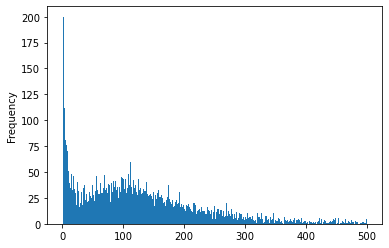

In [70]:
# Histogram
crime_gdf[crime_gdf["Incidents by 1000 households"] <= 500]["Incidents by 1000 households"].plot(kind="hist", bins=500)

/home/danph/anaconda3/envs/pysal-workshop/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Incidents by 1000 households', ylabel='Density'>

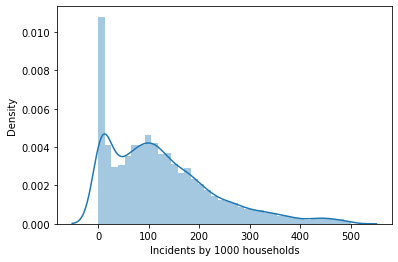

In [79]:
sbn.distplot(crime_gdf[crime_gdf["Incidents by 1000 households"] <= 500]["Incidents by 1000 households"])

In [71]:
crime_gdf["Incidents by 1000 population"].describe()

count      9001.000000
mean        253.708380
std        6321.600042
min           0.031883
25%          12.987013
50%          30.726257
75%          51.622419
max      239000.000000
Name: Incidents by 1000 population, dtype: float64

<AxesSubplot:ylabel='Frequency'>

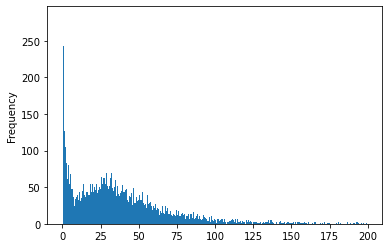

In [72]:
# Histogram
crime_gdf[crime_gdf["Incidents by 1000 population"] <= 200]["Incidents by 1000 population"].plot(kind="hist", bins=500)

In [74]:
import seaborn as sbn

/home/danph/anaconda3/envs/pysal-workshop/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Incidents by 1000 population', ylabel='Density'>

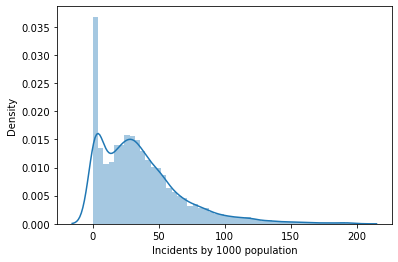

In [77]:
sbn.distplot(crime_gdf[crime_gdf["Incidents by 1000 population"] <= 200]["Incidents by 1000 population"])

In [73]:
# Save data
crime_gdf.to_file("../data/processed/poa_crime_index.geojson", driver="GeoJSON", index=False)